**Exercise 13.11**. Graph the theoretical spectral density for an MA(1) process with $\theta = -0.8$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.   This is analogous to Exercise 13.10, with a new value for $\theta$:

In [1]:
require(ggplot2)
require(data.table)

Loading required package: ggplot2

Loading required package: data.table



In [2]:
spectral_density_ma1 <- function(theta) {
    function(f) {
        1 + theta**2 - 2 * theta * cos(2 * pi * f)
    }
}

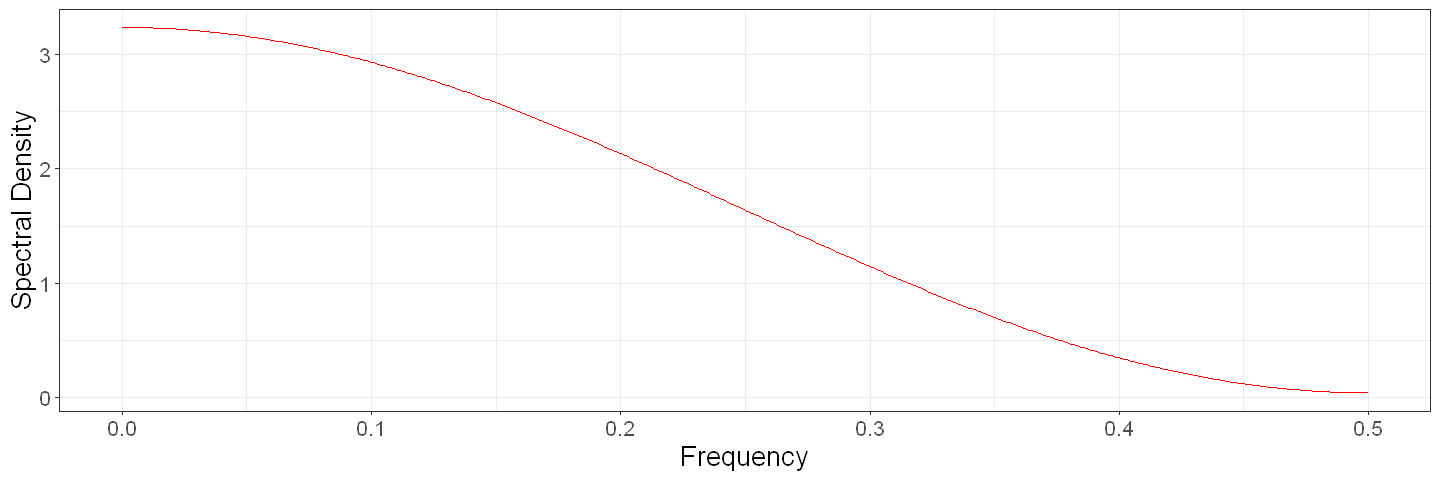

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
ggplot() + 
  geom_line(aes(x=f, y=spectral_density_ma1(-0.8)(f)), color='red') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

This is a "red-shifted" spectral density shape, implying a tendency to slowly change across time.

**Exercise 13.12**.  Show that when $\phi > 0$ the spectral density for an AR(1) process is a decreasing function of frequency, while for $\phi < 0$ the spectral density increases.

**Solution**.  From Equation (13.5.6), the spectral density for the AR(1) process is

$$ S(f) = \frac{\sigma_e^2}{1 + \phi^2 - 2 \phi \cos(2 \pi f)} $$

This is (proportional to) the inverse of the spectral density for the MA(1) process, as we can interpret this as the white noise process being a linear filter of the AR process.  Therefore, the spectral density of the AR(1) process is proportional (with a factor of $\sigma_e^4$) to the inverse of the spectral density of the MA(1) process with parameter $\theta := \phi$, and since the MA(1) spectral density is increasing when $\theta > 0$ and decreasing when $\theta < 0$, the spectral density of the AR(1) process is decreasing when $\phi > 0$ and increasing when $\phi < 0$.

**Exercise 13.13**.  Graph the theoretical spectral density for an AR(1) time series with $\phi = 0.7$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**. As seen on the previous exercise, the spectral density for the AR(1) process is

$$ S(f) = \frac{\sigma_e^2}{1 + \phi^2 - 2 \phi \cos(2 \pi f)} $$

Assuming $\sigma_e^2 = 1$, we can chart the shape below.

In [4]:
spectral_density_ar1 <- function(phi) {
    function(f) {
        1 / (1 + phi**2 - 2 * phi * cos(2 * pi * f))
    }
}

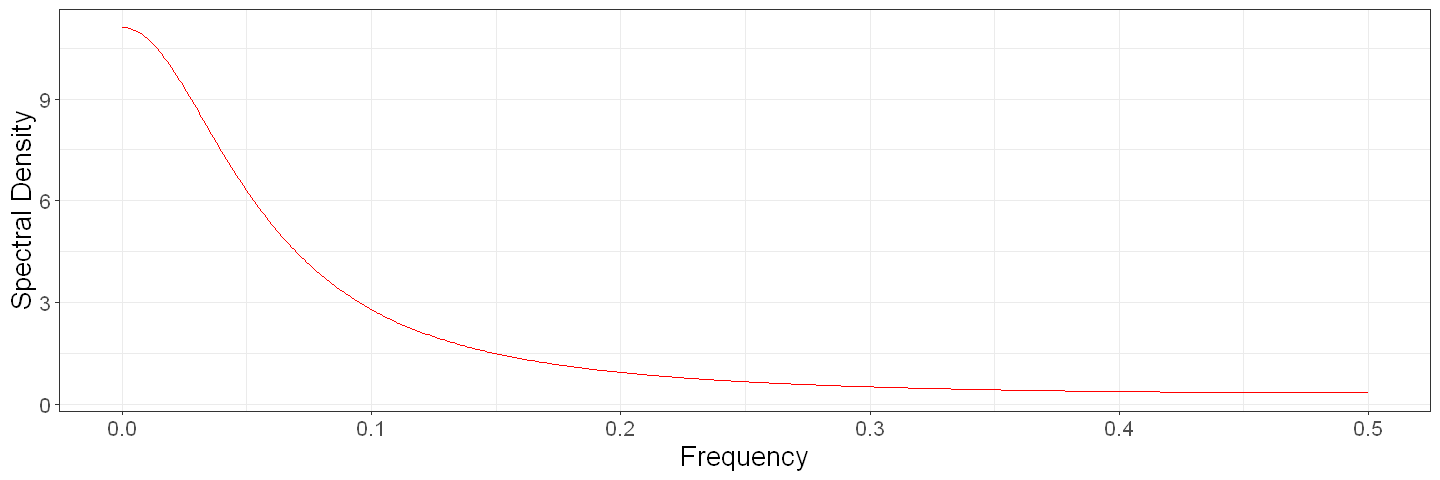

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
ggplot() + 
  geom_line(aes(x=f, y=spectral_density_ar1(0.7)(f)), color='red') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

This is a "red-shifted" spectral density shape, implying a tendency to slowly change across time.

**Exercise 13.14**. Graph the theoretical spectral density for an AR(1) time series with $\phi = −0.4$.  Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.  This is analogous to Exercise 13.13, with a new value for $\phi$:

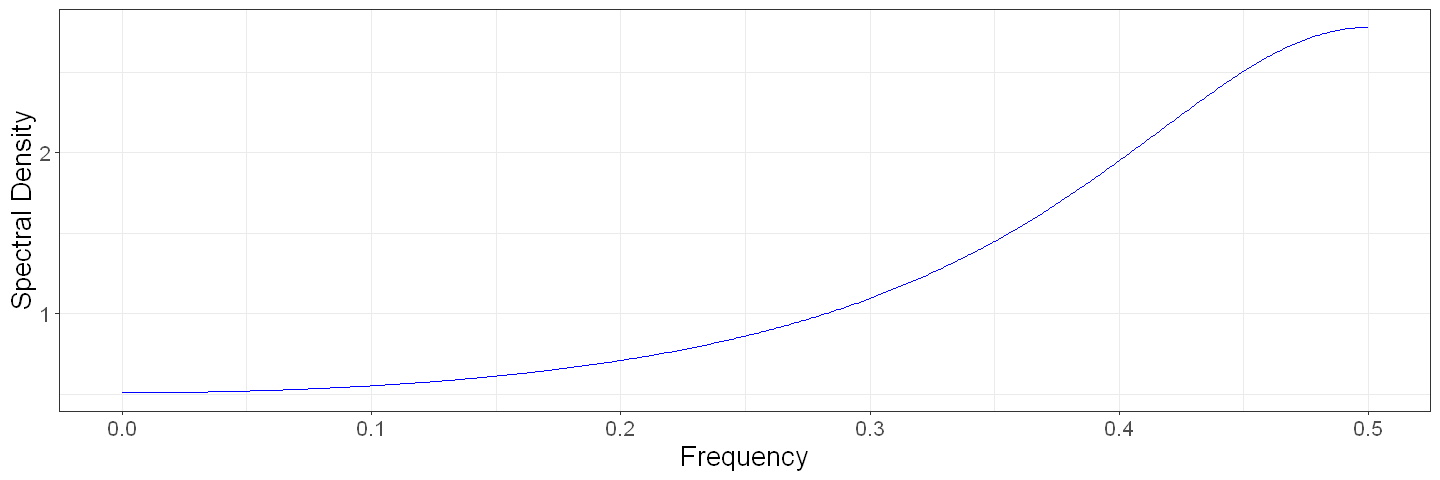

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
ggplot() + 
  geom_line(aes(x=f, y=spectral_density_ar1(-0.4)(f)), color='blue') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

This is a "blue-shifted" spectral density shape, implying a tendency to oscillate across its mean level quickly.

**Exercise 13.15**. Graph the theoretical spectral density for an MA(2) time series with $\theta_1 = −0.5$ and $\theta_2 = 0.9$. Interpret the implications of the shape of the spectrum on the possible time series plots of the series values.

**Solution**.  The spectral density for the MA(2) process can be obtained with $c_0 = 1$, $c_1 = -\theta_1$ and $c_2 = -\theta_2$:

$$
\begin{align}
|C(e^{-2\pi if})|^2 = (1 - \theta_1 e^{-2 \pi if} - \theta_2 e^{-4 \pi if})^2
\end{align}
$$

The result is provided in Equation (13.5.4),

$$ S(f) = [1 + \theta_1^2 + \theta_2^2 - 2 \theta_1 (1 - \theta_2) \cos(2 \pi f) - 2 \theta_2 \cos (4 \pi f) ] \sigma_e^2 $$

In [7]:
spectral_density_ma2 <- function(theta1, theta2) {
    function(f) {
       (1 + theta1**2 + theta2**2 - 2 * theta1 * (1 - theta2) * cos(2 * pi * f) - 2 * theta2 * cos(4 * pi * f))
    }
}

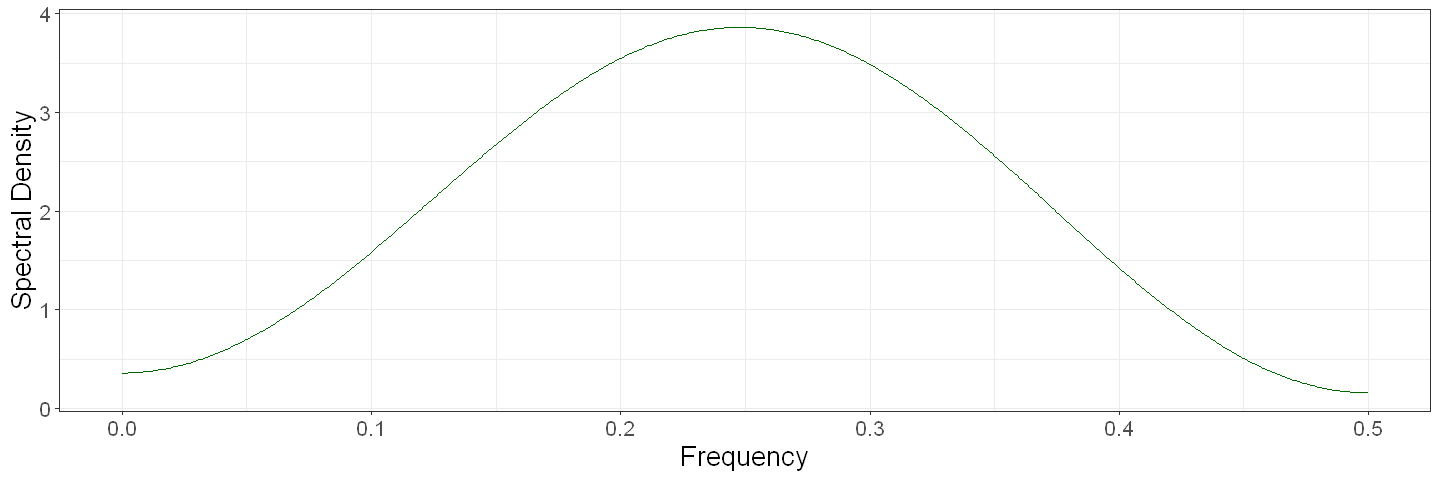

In [8]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
ggplot() + 
  geom_line(aes(x=f, y=spectral_density_ma2(-0.5, 0.9)(f)), color='darkgreen') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

The spectral density has a peak around 0.25.

**Exercise 13.16**.  Graph the theoretical spectral density for an MA(2) time series with $\theta_1 = 0.5$ and $\theta_2 = −0.9$. Interpret the implications of the shape of the spectrum on the possible time series plots of the series values.

**Solution**.

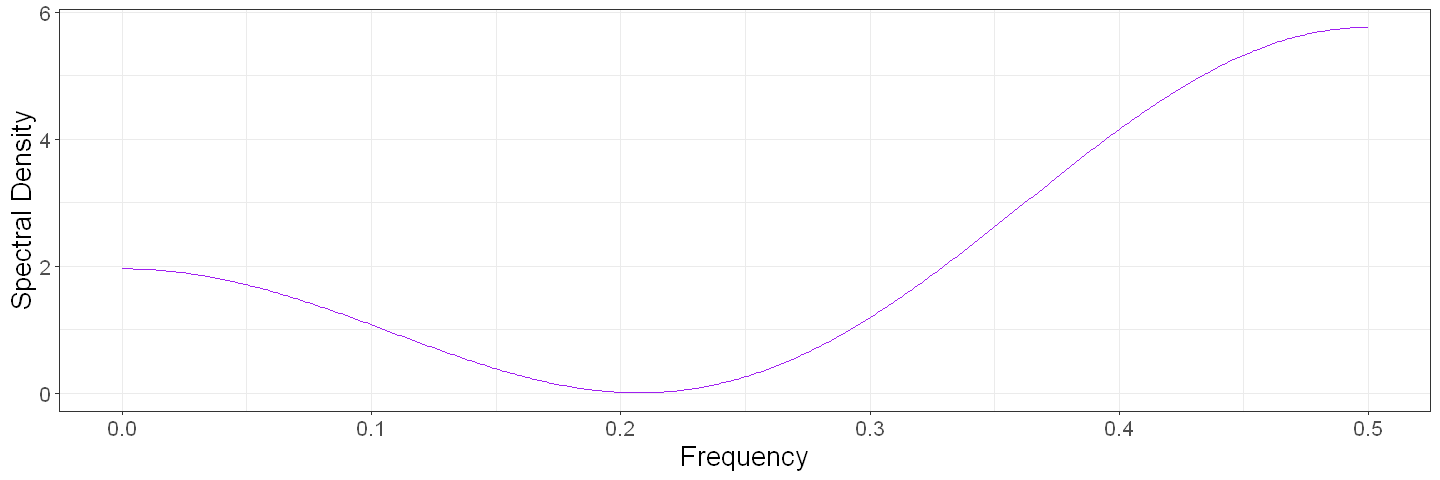

In [9]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
ggplot() + 
  geom_line(aes(x=f, y=spectral_density_ma2(0.5, -0.9)(f)), color='purple') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

The spectral density has a trough around 0.2, and stronger components around 0 and 0.5.  The series will present both low frequency and high frequency characteristics.

**Exercise 13.17**. Graph the theoretical spectral density for an AR(2) time series with $\phi_1 = −0.1$ and $\phi_2 = −0.9$. Interpret the implications of the shape of the spectrum on the possible time series plots of the series values.

**Solution**.  The spectral density for the AR(2) process can be obtained in the same manner as the one for the AR(1) process -- applying the filter "backwards" as an MA filter.  Inverting the MA(2) result, we get the AR(2) spectral frequency formula, also given in Equation (13.5.7),

$$ S(f) = \frac{\sigma_e^2}{1 + \phi_1^2 + \phi_2^2 - 2 \phi_1 (1 - \phi_2) \cos(2 \pi f) - 2 \phi_2 \cos (4 \pi f) } $$

In [10]:
spectral_density_ar2 <- function(phi1, phi2) {
    function(f) {
       1 / (1 + phi1**2 + phi2**2 - 2 * phi1 * (1 - phi2) * cos(2 * pi * f) - 2 * phi2 * cos(4 * pi * f))
    }
}

[1] "Peak:  0.258"


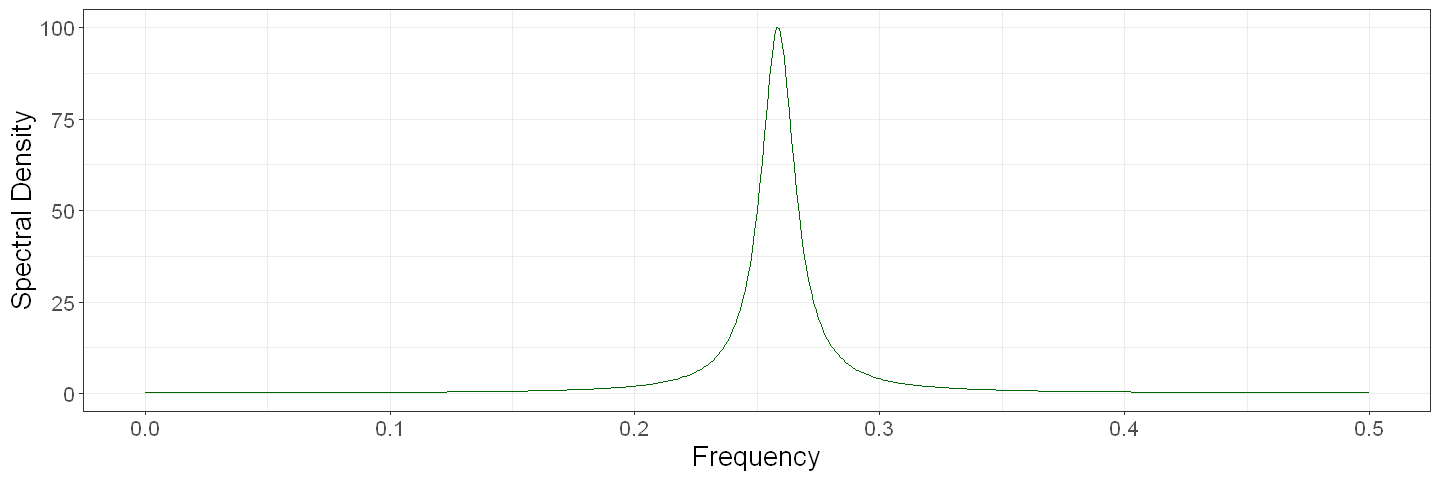

In [11]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
d = spectral_density_ar2(-0.1, -0.9)(f)

ggplot() + 
  geom_line(aes(x=f, y=d), color='darkgreen') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

print(paste('Peak: ', f[which.max(d)]))

This process has a strong peak around 0.258, causing it to fluctuate mainly with that frequency.

**Exercise 13.18**.  Graph the theoretical spectral density for an AR(2) process with $\phi_1 = 1.8$ and $\phi_2 = −0.9$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.

[1] "Peak:  0.051"


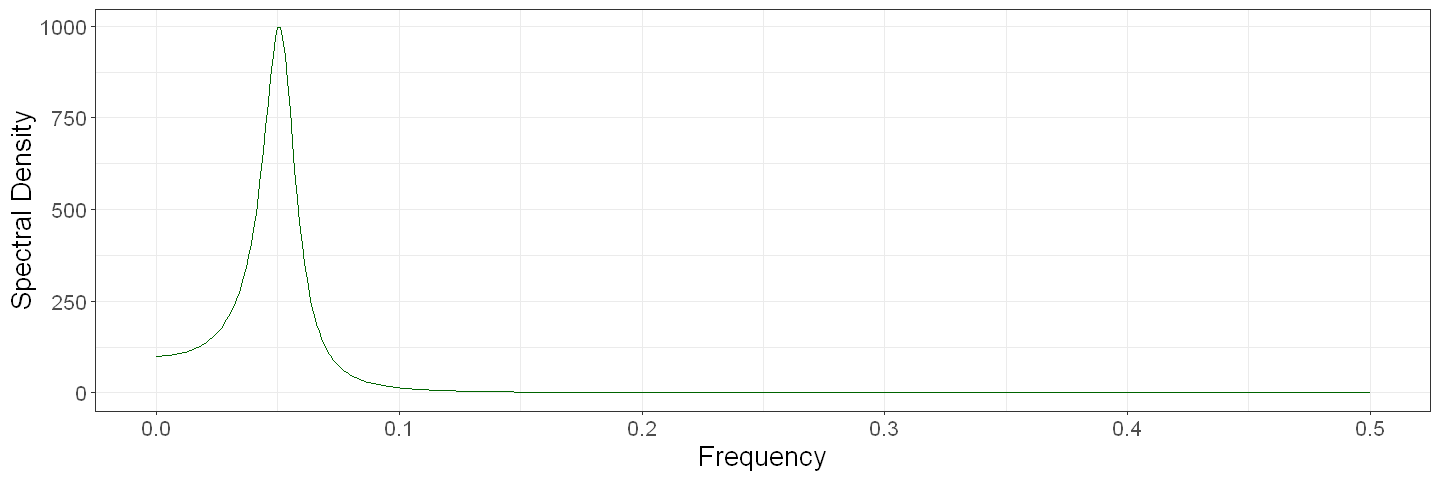

In [12]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
d = spectral_density_ar2(1.8, -0.9)(f)

ggplot() + 
  geom_line(aes(x=f, y=d), color='darkgreen') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

print(paste('Peak: ', f[which.max(d)]))

The process has a strong peak around 0.051, causing it to fluctuate mainly with that frequency.

**Exercise 13.19**. Graph the theoretical spectral density for an AR(2) process with $\phi_1 = −1$ and $\phi_2 = −0.8$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.

[1] "Peak:  0.345"


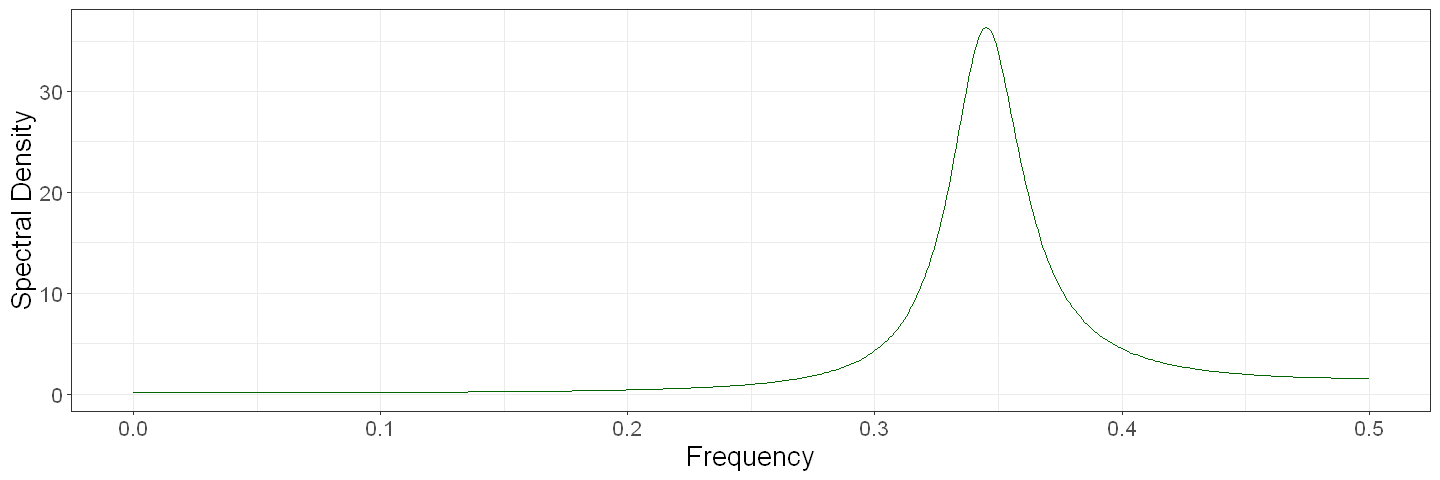

In [13]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
d = spectral_density_ar2(-1, -0.8)(f)

ggplot() + 
  geom_line(aes(x=f, y=d), color='darkgreen') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

print(paste('Peak: ', f[which.max(d)]))

The process has a strong peak around 0.245 causing it to fluctuate mainly with that frequency.

**Exercise 13.20**. Graph the theoretical spectral density for an AR(2) process with $\phi_1 = 0.5$ and $\phi_2 = 0.4$. Interpret the implications of the shape of the spectrum on the possible plots of the time series values.

**Solution**.

[1] "Peak:  0"


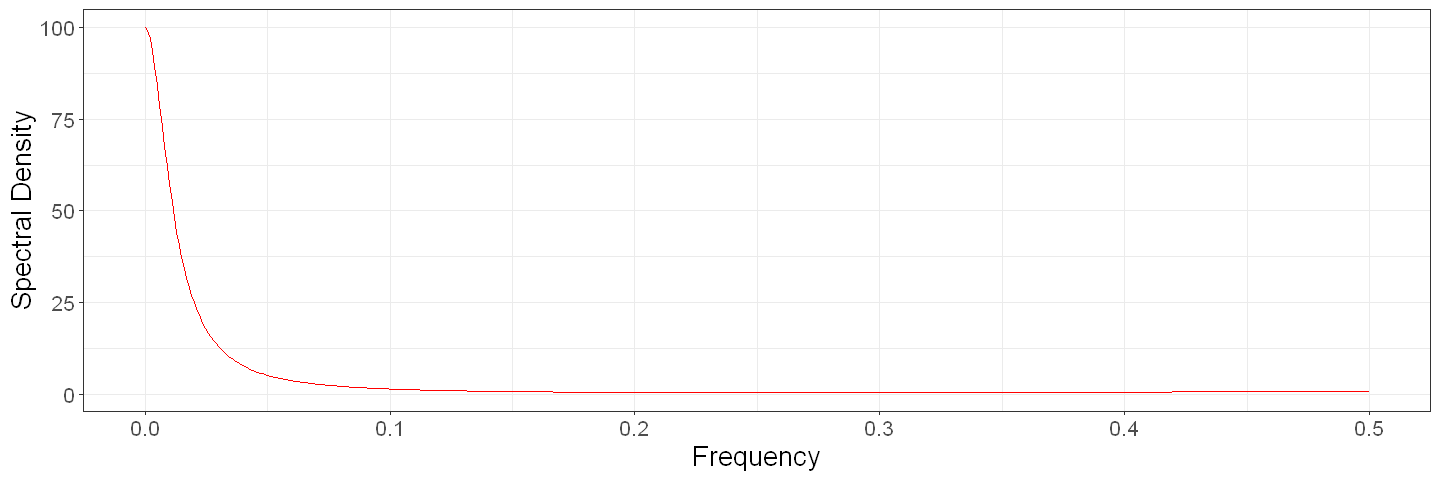

In [14]:
options(repr.plot.width=12, repr.plot.height=4)

f = 0:500 / 1000
d = spectral_density_ar2(0.5, 0.4)(f)

ggplot() + 
  geom_line(aes(x=f, y=d), color='red') +
  xlab('Frequency') + ylab('Spectral Density') +
  theme_bw() + theme(text = element_text(size=16))

print(paste('Peak: ', f[which.max(d)]))

The process has highest spectral density at frequency 0, with density much higher for lower frequencies than higher frequencies.  A process with this characteristic tends to change slowly.